In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from matplotlib.ticker import ScalarFormatter
plt.rcParams['font.size'] = 18
plt.figure(figsize=(8, 6))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<Figure size 576x432 with 0 Axes>

In [158]:
equal_chunks = pd.read_csv("results_tor_repos_with_equal_chunk_size.csv")
multiserver = pd.read_csv("results_tor_repos_split_into_multiserver.csv")
multiserver_sequentially = pd.read_csv("results_tor_repos_split_into_multiserver_sequentially.csv")
multiserver_5MB = pd.read_csv("results_tor_repos_split_into_multiserver_for_single_chunk_size.csv")

In [159]:
time_columns = ["SERVER_DB_SETUP_TIME", "CLIENT_BUILDING_QUERY", "SERVER_ANSWER_QUERY_TIME", "CLIENT_RECONSTRUCTION_TIME"]
for col in time_columns:
    multiserver_sequentially[col] = multiserver_sequentially[col].str.replace(' ms', '').astype(float)
    equal_chunks[col] = equal_chunks[col].str.replace(' ms', '').astype(float)
    multiserver[col] = multiserver[col].str.replace(' ms', '').astype(float)
    multiserver_5MB[col] = multiserver_5MB[col].str.replace(' ms', '').astype(float)

equal_chunks["SERVER_DB_SETUP_TIME"] = equal_chunks["SERVER_DB_SETUP_TIME"] / 1000
equal_chunks["CLIENT_BUILDING_QUERY"] = equal_chunks["CLIENT_BUILDING_QUERY"] / 1000
equal_chunks["SERVER_ANSWER_QUERY_TIME"] = equal_chunks["SERVER_ANSWER_QUERY_TIME"] / 1000
equal_chunks["CLIENT_RECONSTRUCTION_TIME"] = equal_chunks["CLIENT_RECONSTRUCTION_TIME"] / 1000

multiserver["SERVER_DB_SETUP_TIME"] = multiserver["SERVER_DB_SETUP_TIME"] / 1000
multiserver["CLIENT_BUILDING_QUERY"] = multiserver["CLIENT_BUILDING_QUERY"] / 1000
multiserver["SERVER_ANSWER_QUERY_TIME"] = multiserver["SERVER_ANSWER_QUERY_TIME"] / 1000
multiserver["CLIENT_RECONSTRUCTION_TIME"] = multiserver["CLIENT_RECONSTRUCTION_TIME"] / 1000

multiserver_sequentially["SERVER_DB_SETUP_TIME"] = multiserver_sequentially["SERVER_DB_SETUP_TIME"] / 1000
multiserver_sequentially["CLIENT_BUILDING_QUERY"] = multiserver_sequentially["CLIENT_BUILDING_QUERY"] / 1000
multiserver_sequentially["SERVER_ANSWER_QUERY_TIME"] = multiserver_sequentially["SERVER_ANSWER_QUERY_TIME"] / 1000
multiserver_sequentially["CLIENT_RECONSTRUCTION_TIME"] = multiserver_sequentially["CLIENT_RECONSTRUCTION_TIME"] / 1000

multiserver_5MB["SERVER_DB_SETUP_TIME"] = multiserver_5MB["SERVER_DB_SETUP_TIME"] / 1000
multiserver_5MB["CLIENT_BUILDING_QUERY"] = multiserver_5MB["CLIENT_BUILDING_QUERY"] / 1000
multiserver_5MB["SERVER_ANSWER_QUERY_TIME"] = multiserver_5MB["SERVER_ANSWER_QUERY_TIME"] / 1000
multiserver_5MB["CLIENT_RECONSTRUCTION_TIME"] = multiserver_5MB["CLIENT_RECONSTRUCTION_TIME"] / 1000


equal_chunks['_ROUND_TRIP'] = equal_chunks['CLIENT_BUILDING_QUERY'] + equal_chunks['SERVER_ANSWER_QUERY_TIME'] + equal_chunks['CLIENT_RECONSTRUCTION_TIME']
multiserver['_ROUND_TRIP'] = multiserver['CLIENT_BUILDING_QUERY'] + multiserver['SERVER_ANSWER_QUERY_TIME'] + multiserver['CLIENT_RECONSTRUCTION_TIME']
multiserver_sequentially['_ROUND_TRIP'] = multiserver_sequentially['CLIENT_BUILDING_QUERY'] + multiserver_sequentially['SERVER_ANSWER_QUERY_TIME'] + multiserver_sequentially['CLIENT_RECONSTRUCTION_TIME']
multiserver_5MB['_ROUND_TRIP'] = multiserver_5MB['CLIENT_BUILDING_QUERY'] + multiserver_5MB['SERVER_ANSWER_QUERY_TIME'] + multiserver_5MB['CLIENT_RECONSTRUCTION_TIME']


size_columns = ["FILE_SIZE", "SERVER_DB_SIZE", "SERVER_DB_SETUP_OFFLINE_DOWNLOAD", "CLIENT_BUILDING_QUERY_ONLINE_UPLOAD", "SERVER_ANSWER_QUERY_ONLINE_DOWNLOAD"]
for col in size_columns:
    multiserver_sequentially[col] = multiserver[col].str.replace(' MB', '').str.replace(' KB', '').astype(float)
    equal_chunks[col] = equal_chunks[col].str.replace(' MB', '').str.replace(' KB', '').astype(float)
    multiserver[col] = multiserver[col].str.replace(' MB', '').str.replace(' KB', '').astype(float)
    multiserver_5MB[col] = multiserver_5MB[col].str.replace(' MB', '').str.replace(' KB', '').astype(float)


equal_chunks['_COMM'] = equal_chunks['CLIENT_BUILDING_QUERY_ONLINE_UPLOAD'] + equal_chunks['SERVER_ANSWER_QUERY_ONLINE_DOWNLOAD']
multiserver['_COMM'] = multiserver['CLIENT_BUILDING_QUERY_ONLINE_UPLOAD'] + multiserver['SERVER_ANSWER_QUERY_ONLINE_DOWNLOAD']
multiserver_sequentially['_COMM'] = multiserver_sequentially['CLIENT_BUILDING_QUERY_ONLINE_UPLOAD'] + multiserver_sequentially['SERVER_ANSWER_QUERY_ONLINE_DOWNLOAD']
multiserver_5MB['_COMM'] = multiserver_5MB['CLIENT_BUILDING_QUERY_ONLINE_UPLOAD'] + multiserver_5MB['SERVER_ANSWER_QUERY_ONLINE_DOWNLOAD']

equal_chunks = equal_chunks.drop_duplicates()

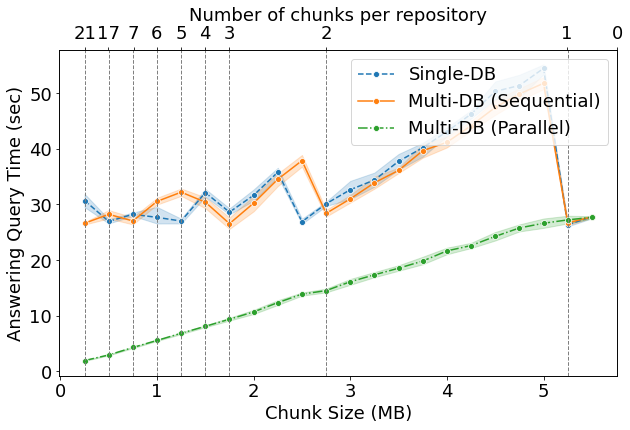

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='CHUNK_SIZE (MB)', y='SERVER_ANSWER_QUERY_TIME', data=equal_chunks, label='Single-DB', marker='o', linestyle='dashed')
sns.lineplot(x='CHUNK_SIZE (MB)', y='SERVER_ANSWER_QUERY_TIME', data=multiserver_sequentially, label='Multi-DB (Sequential)', marker='o', linestyle='solid')
sns.lineplot(x='CHUNK_SIZE (MB)', y='SERVER_ANSWER_QUERY_TIME', data=multiserver, label='Multi-DB (Parallel)', marker='o', linestyle='dashdot')

plt.xlabel("Chunk Size (MB)")
plt.ylabel("Answering Query Time (sec)")
plt.legend(loc='upper right')
plt.grid(False)

plt.axvline(x=0.25, color='gray', linestyle='--', linewidth=1, label='21')
plt.axvline(x=0.50, color='gray', linestyle='--', linewidth=1, label='17')
plt.axvline(x=0.75, color='gray', linestyle='--', linewidth=1, label='7')
plt.axvline(x=1.00, color='gray', linestyle='--', linewidth=1, label='6')
plt.axvline(x=1.25, color='gray', linestyle='--', linewidth=1, label='5')
plt.axvline(x=1.50, color='gray', linestyle='--', linewidth=1, label='4')
plt.axvline(x=1.75, color='gray', linestyle='--', linewidth=1, label='3')
plt.axvline(x=2.75, color='gray', linestyle='--', linewidth=1, label='2')
plt.axvline(x=5.25, color='gray', linestyle='--', linewidth=1, label='1')

top_axis_labels = ['21', '17', '7', '6', '5', '4', '3', '2', '1', '0']
top_axis_positions = [0.24, 0.46, 0.70, 0.92, 1.15, 1.37, 1.60, 2.51, 4.78, 5.25]

top_ax = plt.twiny()
top_ax.set_xlim(plt.xlim())
top_ax.set_xticks(top_axis_positions)
top_ax.set_xticklabels(top_axis_labels)
top_ax.set_xlabel("Number of chunks per repository")
plt.grid(False)

plt.savefig('./Images/answering_query_single_DB_multi_DB_parallel_sequential_against_different_chunk_sizes.png', dpi=600)

plt.show()


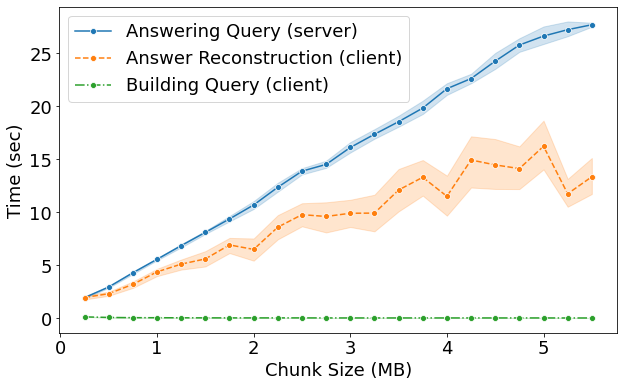

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(x='CHUNK_SIZE (MB)', y='SERVER_ANSWER_QUERY_TIME', data=multiserver, label='Answering Query (server)', marker='o', linestyle='solid')
sns.lineplot(x='CHUNK_SIZE (MB)', y='CLIENT_RECONSTRUCTION_TIME', data=multiserver, label='Answer Reconstruction (client)', marker='o', linestyle='dashed')
sns.lineplot(x='CHUNK_SIZE (MB)', y='CLIENT_BUILDING_QUERY', data=multiserver, label='Building Query (client)', marker='o', linestyle='dashdot')

plt.xlabel("Chunk Size (MB)")
plt.ylabel("Time (sec)")
plt.legend()
plt.grid(False)

plt.savefig('./Images/multi-db_execution_time_with_different_chunk_sizes.png', dpi=600)

plt.show()

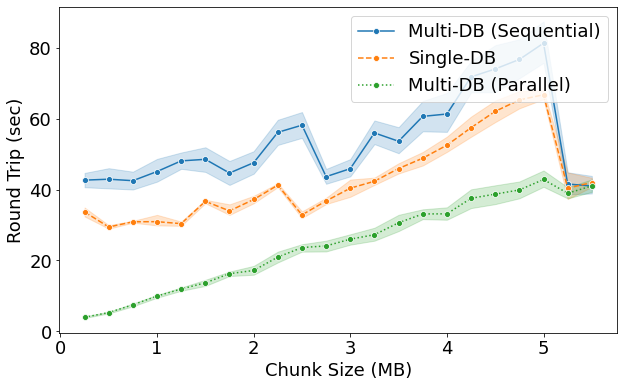

In [110]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='CHUNK_SIZE (MB)', y='_ROUND_TRIP', data=multiserver_sequentially, label='Multi-DB (Sequential)', marker='o', linestyle='solid')
sns.lineplot(x='CHUNK_SIZE (MB)', y='_ROUND_TRIP', data=equal_chunks, label='Single-DB', marker='o', linestyle='dashed')
sns.lineplot(x='CHUNK_SIZE (MB)', y='_ROUND_TRIP', data=multiserver, label='Multi-DB (Parallel)', marker='o', linestyle='dotted')

plt.xlabel("Chunk Size (MB)")
plt.ylabel("Round Trip (sec)")
plt.legend(loc='upper right')
plt.grid(False)

plt.savefig('./Images/round_trips_single_DB_multi_DB_in_parallel_or_sequential_against_different_chunk_sizes.png', dpi=600)

plt.show()

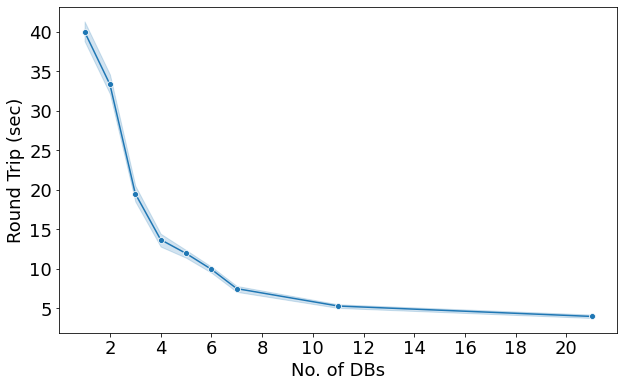

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='NUM_DB', y='_ROUND_TRIP', data=multiserver, label='_Parallel', marker='o')

plt.xlabel("No. of DBs")
plt.ylabel("Round Trip (sec)")
plt.grid(False)
plt.xticks(np.arange(2, 22, 2))

plt.savefig('./Images/round_trip_multi_server_against_num_db.png', dpi=600)

plt.show()

# Overhead

In [162]:
tor_repos = pd.read_csv("export_tor_repos_times.csv")
tor_repos = tor_repos[tor_repos["ORIGINAL_REPO_SIZE"] < 5.1]

In [163]:
multiserver_5MB['id'] = range(1, len(multiserver_5MB) + 1)
tor_repos = tor_repos[["id", "Repository", "ORIGINAL_REPO_SIZE", "Cloning Time (seconds)"]]
multiserver_5MB = multiserver_5MB[["id", "_ROUND_TRIP", "CLIENT_BUILDING_QUERY", "SERVER_ANSWER_QUERY_TIME", "CLIENT_RECONSTRUCTION_TIME", "_COMM"]]
multiserver_5MB = pd.merge(tor_repos, multiserver_5MB, on='id')
multiserver_5MB['round_trip_with_cloning'] = multiserver_5MB['_ROUND_TRIP'] + multiserver_5MB['Cloning Time (seconds)']

Q1 = multiserver_5MB['_ROUND_TRIP'].quantile(0.25)
Q3 = multiserver_5MB['_ROUND_TRIP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
multiserver_5MB = multiserver_5MB[(multiserver_5MB['_ROUND_TRIP'] >= lower_bound) & (multiserver_5MB['_ROUND_TRIP'] <= upper_bound)]

multiserver_5MB['network_time'] = multiserver_5MB['_COMM'] / 12500
multiserver_5MB['round_trip_with_cloning'] = multiserver_5MB['round_trip_with_cloning'] + multiserver_5MB['network_time']
multiserver_5MB['network_time_for_git_clone'] = multiserver_5MB['ORIGINAL_REPO_SIZE'] / 12.5
multiserver_5MB['git_clone_with_network'] = multiserver_5MB['Cloning Time (seconds)'] + multiserver_5MB['network_time_for_git_clone']
multiserver_5MB['overhead'] = multiserver_5MB['round_trip_with_cloning'] - multiserver_5MB['git_clone_with_network']

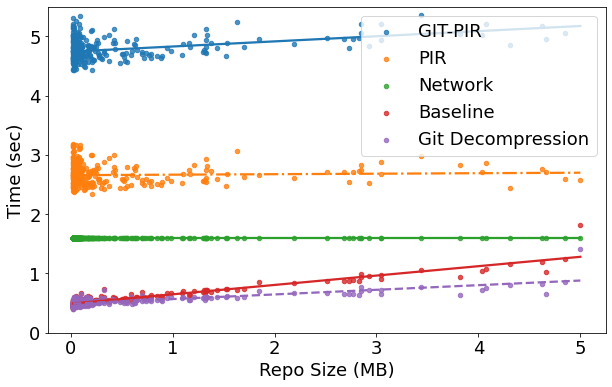

In [170]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ORIGINAL_REPO_SIZE', y='round_trip_with_cloning', data=multiserver_5MB, label='GIT-PIR', order=1, ci=None, scatter_kws={'s': 20}, line_kws={'linestyle': '-'})
sns.regplot(x='ORIGINAL_REPO_SIZE', y='_ROUND_TRIP', data=multiserver_5MB, label='PIR', order=1, ci=None, scatter_kws={'s': 20}, line_kws={'linestyle': '-.'})
sns.regplot(x='ORIGINAL_REPO_SIZE', y='network_time', data=multiserver_5MB, label='Network', order=1, ci=None, scatter_kws={'s': 20})
sns.regplot(x='ORIGINAL_REPO_SIZE', y='git_clone_with_network', data=multiserver_5MB, label='Baseline', order=1, ci=None, scatter_kws={'s': 20}, line_kws={'linestyle': '-'})
sns.regplot(x='ORIGINAL_REPO_SIZE', y='Cloning Time (seconds)', data=multiserver_5MB, label='Git Decompression', order=1, ci=None, scatter_kws={'s': 20}, line_kws={'linestyle': '--'})

plt.xlabel("Repo Size (MB)")
plt.ylabel("Time (sec)")
plt.ylim(0, 5.5)
plt.legend(loc='upper right')
plt.grid(False)

plt.savefig('./Images/tor_round_trip_against_traditional_clone.png', dpi=600)

plt.show()

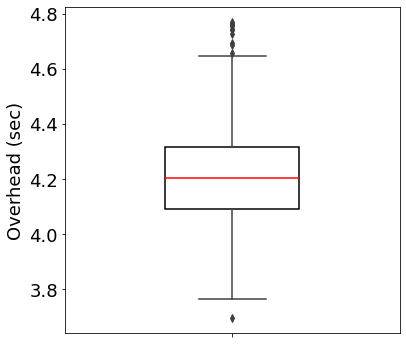

In [175]:
plt.figure(figsize=(6, 6))

medianprops = {'color': 'red'}
boxprops = {'facecolor': 'white', 'edgecolor': 'black'}

sns.boxplot(y='overhead', data=multiserver_5MB, showfliers=True, medianprops=medianprops, boxprops=boxprops, width=0.4)

plt.ylabel("Overhead (sec)")
plt.grid(False)

plt.savefig('./Images/boxplot_overhead.png', dpi=600)
plt.show()